# 8.811: Stats Assignment

Below is some code you can use as a starting point for the script you will turn in.

We provide the "8.811" kernel on SubMIT's Jupyterhub (https://submit.mit.edu/jupyter/), which has a python installation with all the necessary packages to run this script and complete the rest assginment, if you don't want to install them by yourself. To access it, click the drop-down menu in the top right, which will prompt a "Select Kernel" screen, and select "8.811". SubMIT also has a lot of computational resources available for free to all MIT physics students.

We suggest using the `zfit` module to perform the fitting and toys generation. You don't have to use it, nor do you have to use a jupyter notebook, nor do you have to use Python. Use whatever you need to get this to work for you.

In [1]:
import os
os.environ['ZFIT_DISABLE_TF_WARNINGS'] = '1'

import numpy as np
import matplotlib.pyplot as plt
import zfit
from zfit import z
import hist
from hist import Hist

Grab the input data using `wget`

Open the input data, and display some events. The values are the di-photon mass for different events.

In [2]:
data = np.load("../Data/toy_dataset.csv.npy")
print("Data shape:", data.shape)
print("Example data:", data[:10])

Data shape: (300, 1)
Example data: [[123.12572729]
 [146.21653113]
 [126.55531839]
 [124.05737808]
 [126.50817846]
 [137.59908092]
 [105.94534142]
 [132.45773271]
 [149.77449329]
 [129.10474416]]


Plot a histogram of the input data

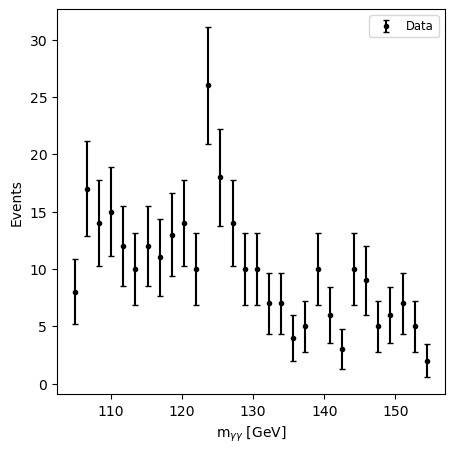

In [3]:
# range of the data
m_range = (np.min(data)-1, np.max(data)+1)

fig = plt.figure(figsize=(5,5))
ax = fig.subplots()

# define a histogram
hist = Hist.new.Reg(30, m_range[0], m_range[1]).Weight()
hist.fill(data[:,0])

# and plot it
ax.errorbar(hist.axes[0].centers, hist.values(), np.sqrt(hist.variances()), color='black', capsize=2, linestyle='', marker='o', markersize=3, label='Data')
ax.set_xlabel(r"$\mathrm{m}_{\gamma\gamma}$ [GeV]")
ax.set_ylabel('Events')
ax.legend(fontsize='small')
plt.show()

Here we provide some sample code to define fitting models using the `zfit` package. (See docs: https://zfit.readthedocs.io/en/stable/)

We define two the models that you can use to fit:
1. `exp_model`: exponential with parameter $\lambda$
2. `combined_model` = Exponential + Gaussian: exponential with parameter $\lambda$, and Gaussian with parameters $\mu$, $\sigma$. The $\sigma$ of the Gaussian is fixed (`floating=False`): since the Higgs has ~no width, it's only related to detector resoultion. The sum of the Exp. and Gauss. has an unknown (to be fit) `frac_exp` parameters, which is the fraction of the exponential background over the total of background + signal. This is related to the "signal strength" of the process we are searching for.

In [4]:
lambda_param = 1 # parameter of the exponential DUMMY VALUE
exp_lambda = zfit.Parameter("lambda", lambda_param)
exp_model = zfit.pdf.Exponential(lam=exp_lambda, obs=zfit.Space("x", limits=m_range))

m_higgs = 130 # mean of the gaussian at the Higgs mass DUMMY VALUE
detector_resolution = 2 # width of the gaussian peak FIXED
gauss_mean = zfit.Parameter("mean", m_higgs, lower=m_range[0], upper=m_range[1])
gauss_sigma = zfit.Parameter("sigma", detector_resolution, floating=False) # we fix the width of the Gaussian peak! i.e. this will not be fitted
gauss_model = zfit.pdf.Gauss(mu=gauss_mean, sigma=gauss_sigma, obs=zfit.Space("x", limits=m_range))

frac_signal = 0.5 # fraction of signal over background DUMMY VALUE
frac_exp = zfit.Parameter("frac_exp", 1-frac_signal, 1-2*frac_signal, 1)
combined_model = zfit.pdf.SumPDF([exp_model, gauss_model], fracs=frac_exp, obs=zfit.Space("x", limits=m_range))